## Task1 Probability & Statistics
You have a textual dataset (Tweets). Pick 3 words pair. Intuitively they should be 

* **Independent** (Sky and apple) 
* **Have weak dependency** (mine and business)
* **Have Strong Dependency** (Weapon and War)

Find absolute probability for each word in your corpus <br>
Find probability of Word given it’s pair <br>
Find pair probability given it’s word <br>
Make a conclusion on pair dependencies

Compute pearson correlation coefficient on word and pair frequencies in corpus chunks*


### Load DataFrame and clean text

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir("/content/drive/My Drive/AI")

In [0]:
import re
from datetime import datetime
import numpy as np
import pandas as pd

In [0]:
df = pd.read_csv('twitbase2.tsv', sep ='\t')

In [0]:
df["created_at"] = df["created_at"].apply(datetime.fromtimestamp)

In [6]:
df.head(10)

,text,src,coordinates,place,created_at
0,"RT @europecoinEUORG: ""cloudy"" perspective FINA...",twitter,NaN,NaN,2018-10-23 23:06:31
1,RT @moonemotion: #5G will move massive amounts...,twitter,NaN,NaN,2018-10-23 23:06:31
2,RT @udacity: Hours left to apply for the @PyTo...,twitter,NaN,NaN,2018-10-23 23:06:36
3,RT @MikeQuindazzi: #AI and #IoT the most relev...,twitter,NaN,NaN,2018-10-23 23:06:37
4,RT @rajat_shrimal: This futuristic bus is 100%...,twitter,NaN,NaN,2018-10-23 23:06:38
5,RT @TamaraMcCleary: #Industry40 is set to have...,twitter,NaN,NaN,2018-10-23 23:06:38
6,RT @MikeQuindazzi: 20+ years of US #VentureCap...,twitter,NaN,NaN,2018-10-23 23:06:45
7,The latest The Explore Communications Daily! h...,twitter,NaN,NaN,2018-10-23 23:06:46
8,RT @MikeQuindazzi: #ArtificialIntelligence met...,twitter,NaN,NaN,2018-10-23 23:06:48
9,Blurring Lines: AI and ML in Marketing and Adv...,twitter,NaN,NaN,2018-10-23 23:06:49


In [7]:
df.shape

(15580, 5)

In [8]:
from bs4 import BeautifulSoup
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def clean_text_lemma(text): 
    ''' 
    Utility function to clean tweet text by removing links, special characters 
    using simple regex statements. Also converting words to lemmas.
    '''
    wordnet_lemmatizer = WordNetLemmatizer()
    text = BeautifulSoup(text, 'html.parser').get_text()    
    stripped_text = re.sub("(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(RT\s)", " ", text).lower().split()
    lemma_text = [wordnet_lemmatizer.lemmatize(word) for word in stripped_text]
    join_text = ' '.join(lemma_text)
    return join_text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
df["text_stripped"] = df["text"].apply(clean_text_lemma)

In [0]:
del(df['coordinates'])
del(df['place'])
del(df['src'])
del(df['text'])

### Finding conditional probability for words pair ('ai', 'machinelearning') per chunk

In [0]:
def word_count(text, word='[\s]ai[\s]'):
  count = len(re.findall(word, text))
  return count

In [0]:
df['text_len'] = [len(t.split()) for t in df.text_stripped]

In [0]:
df['w1_count'] = df['text_stripped'].apply(lambda x: word_count(x, word=r'(\b)ai(\b)'))
df['w2_count'] = df['text_stripped'].apply(lambda x: word_count(x, word=r'machinelearning'))

In [14]:
df['count_w1_w2'] = df['w1_count'].apply(lambda x: [x]) + df['w2_count'].apply(lambda x: [x])
df.head(10)

,created_at,text_stripped,text_len,w1_count,w2_count,count_w1_w2
0,2018-10-23 23:06:31,cloudy perspective financecloud api device cry...,14,0,0,"[0, 0]"
1,2018-10-23 23:06:31,5g will move massive amount of data transforma...,19,0,0,"[0, 0]"
2,2018-10-23 23:06:36,hour left to apply for the scholarship challen...,12,1,0,"[1, 0]"
3,2018-10-23 23:06:37,ai and iot the most relevant emergingtech in i...,16,2,0,"[2, 0]"
4,2018-10-23 23:06:38,this futuristic bus is 100 driverless and full...,13,0,0,"[0, 0]"
5,2018-10-23 23:06:38,industry40 is set to have a significant impact...,14,0,0,"[0, 0]"
6,2018-10-23 23:06:45,20 year of u venturecapital funding trend by i...,15,1,0,"[1, 0]"
7,2018-10-23 23:06:46,the latest the explore communication daily tha...,10,1,0,"[1, 0]"
8,2018-10-23 23:06:48,artificialintelligence method a shared in rece...,11,1,0,"[1, 0]"
9,2018-10-23 23:06:49,blurring line ai and ml in marketing and adver...,12,2,0,"[2, 0]"


In [0]:
probability = lambda x: len(x[x > 0]) / len(x)
probability.__name__ = "probability"

c_probability = lambda x: len(x[x.apply(lambda row:row[0]) > 0][x.apply(lambda row:row[1]) > 0]) / len(x[x.apply(lambda row:row[0]) > 0])
c_probability.__name__ = "word2 from word1 probability"

c_inv_probability = lambda x: len(x[x.apply(lambda row:row[1]) > 0][x.apply(lambda row:row[0]) > 0]) / len(x[x.apply(lambda row:row[1]) > 0])
c_inv_probability.__name__ = "word1 from word2 probability"


In [16]:
df.groupby(lambda x: x//1000)["w1_count", "w2_count", "text_len"].agg({'ai ml statistics by chunk': ['sum', 'mean', 'max', probability]})

ai ml statistics by chunk                                                \
                    w1_count                           w2_count              
                         sum      mean max probability      sum   mean max   
0                        598  0.598000   3    0.539000      107  0.107   1   
1                        658  0.658000   3    0.582000      100  0.100   1   
2                        680  0.680000   3    0.585000      110  0.110   1   
3                        597  0.597000   3    0.531000       59  0.059   1   
4                        640  0.640000   3    0.568000      103  0.103   1   
5                        679  0.679000   3    0.607000       95  0.095   1   
6                        673  0.673000   2    0.596000       79  0.079   1   
7                        606  0.606000   3    0.558000      100  0.100   1   
8                        629  0.629000   2    0.586000      111  0.111   1   
9                        627  0.627000   2    0.583000      117  0.117   1   
10                       618  0.618000   2    0.576000       74  0.074   1   
11                       686  0.686000   3    0.634000       94  0.094   2   
12                       653  0.653000   3    0.589000       69  0.069   1   
13                       652  0.652000   3    0.587000       59  0.059   1   
14                       631  0.631000   3    0.571000      119  0.119   1   
15                       358  0.617241   3    0.577586       58  0.100   1   

                                                    
               text_len                             
   probability      sum       mean max probability  
0        0.107    14895  14.895000  29    1.000000  
1        0.100    14638  14.638000  25    1.000000  
2        0.110    15109  15.109000  29    1.000000  
3        0.059    14923  14.923000  29    1.000000  
4        0.103    14389  14.389000  29    0.998000  
5        0.095    14594  14.594000  29    0.998000  
6        0.079    14743  14.743000  28    0.997000  
7        0.100    14563  14.563000  27    0.995000  
8        0.111    14753  14.753000  29    0.997000  
9        0.117    14944  14.944000  28    0.999000  
10       0.074    15054  15.054000  29    1.000000  
11       0.093    15166  15.166000  29    0.998000  
12       0.069    15151  15.151000  26    1.000000  
13       0.059    15046  15.046000  26    0.999000  
14       0.119    15128  15.128000  27    0.997000  
15       0.100     8709  15.015517  26    0.994828

In [17]:
df.groupby(lambda x: x//1000)["count_w1_w2"].agg({'ai ml conditional probability': [c_probability, c_inv_probability]})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


ai ml conditional probability                             
    word2 from word1 probability word1 from word2 probability
0                       0.153989                     0.775701
1                       0.135739                     0.790000
2                       0.167521                     0.890909
3                       0.077213                     0.694915
4                       0.125000                     0.689320
5                       0.112026                     0.715789
6                       0.082215                     0.620253
7                       0.118280                     0.660000
8                       0.138225                     0.729730
9                       0.145798                     0.726496
10                      0.098958                     0.770270
11                      0.110410                     0.752688
12                      0.084890                     0.724638
13                      0.074957                     0.745763
14                      0.154116                     0.739496
15                      0.152239                     0.879310

### Finding conditional probability for words pair ('ai', 'machinelearning') for whole text

In [0]:
all_words = ' '.join([words for words in df['text_stripped']])

In [0]:
all_text_len = len(all_words.split())

In [20]:
all_text_len

231805

In [21]:
all_ai_count = len(re.findall(r'(\b)ai(\b)', all_words)) / float(all_text_len) 
all_ai_count

0.043074998382260955

In [22]:
all_ml_count = len(re.findall('machinelearning', all_words)) / float(all_text_len)
all_ml_count

0.006272513535083368

In [23]:
ai_prob = len(df[df.w1_count > 0]) / len(df)
ai_prob

0.5793966623876765

In [24]:
ml_prob = len(df[df.w2_count > 0]) / len(df)
ml_prob

0.09326059050064185

In [25]:
ml_from_ai_prob = len(df[df.w1_count > 0][df.w2_count > 0]) / len(df[df.w1_count > 0])
ml_from_ai_prob

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.11975185554447768

In [26]:
ai_from_ml_prob = len(df[df.w2_count > 0][df.w1_count > 0]) / len(df[df.w2_count > 0])
ai_from_ml_prob

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.7439779766001376

### Finding words pair ('ai', 'machinelearning') correlation per chunk

In [27]:
df.groupby(lambda x: x//1000)['w1_count'].corr(df['w2_count'])

0     0.204850
1     0.227881
2     0.259411
3     0.115113
4     0.144830
5     0.093248
6     0.114156
7     0.065288
8     0.108049
9     0.102225
10    0.103094
11    0.050258
12    0.065330
13    0.067340
14    0.160264
15    0.175015
Name: w1_count, dtype: float64

In [28]:
df.groupby(lambda x: x//1000)['w1_count'].corr(df['w2_count'], method='kendall')

0     0.189112
1     0.193433
2     0.247051
3     0.104288
4     0.124128
5     0.086785
6     0.082919
7     0.067323
8     0.105920
9     0.103174
10    0.105686
11    0.060941
12    0.069580
13    0.072237
14    0.147876
15    0.186807
Name: w1_count, dtype: float64

In [29]:
df.groupby(lambda x: x//1000)['w1_count'].corr(df['w2_count'], method='spearman')

0     0.193691
1     0.199129
2     0.255645
3     0.106959
4     0.127633
5     0.089242
6     0.085411
7     0.068669
8     0.107899
9     0.105141
10    0.107622
11    0.062214
12    0.071344
13    0.074110
14    0.151501
15    0.189959
Name: w1_count, dtype: float64

### Finding conditional probability for words pair ('intelligence', 'blockchain') per chunk

In [0]:
df['iot_count'] = df['text_stripped'].apply(lambda x: word_count(x, word=r'(\b)intelligence(\b)'))
df['chain_count'] = df['text_stripped'].apply(lambda x: word_count(x, word=r'(\b)blockchain(\b)'))

In [31]:
df['iot_chain'] = df['iot_count'].apply(lambda x: [x]) + df['chain_count'].apply(lambda x: [x])
df.head(10)

,created_at,text_stripped,text_len,w1_count,w2_count,count_w1_w2,iot_count,chain_count,iot_chain
0,2018-10-23 23:06:31,cloudy perspective financecloud api device cry...,14,0,0,"[0, 0]",0,1,"[0, 1]"
1,2018-10-23 23:06:31,5g will move massive amount of data transforma...,19,0,0,"[0, 0]",0,0,"[0, 0]"
2,2018-10-23 23:06:36,hour left to apply for the scholarship challen...,12,1,0,"[1, 0]",0,0,"[0, 0]"
3,2018-10-23 23:06:37,ai and iot the most relevant emergingtech in i...,16,2,0,"[2, 0]",0,0,"[0, 0]"
4,2018-10-23 23:06:38,this futuristic bus is 100 driverless and full...,13,0,0,"[0, 0]",0,0,"[0, 0]"
5,2018-10-23 23:06:38,industry40 is set to have a significant impact...,14,0,0,"[0, 0]",0,0,"[0, 0]"
6,2018-10-23 23:06:45,20 year of u venturecapital funding trend by i...,15,1,0,"[1, 0]",0,0,"[0, 0]"
7,2018-10-23 23:06:46,the latest the explore communication daily tha...,10,1,0,"[1, 0]",0,0,"[0, 0]"
8,2018-10-23 23:06:48,artificialintelligence method a shared in rece...,11,1,0,"[1, 0]",0,0,"[0, 0]"
9,2018-10-23 23:06:49,blurring line ai and ml in marketing and adver...,12,2,0,"[2, 0]",0,0,"[0, 0]"


In [33]:
df.groupby(lambda x: x//1000)["iot_count", "chain_count"].agg({'iot blockchain statistics by chunk': ['sum', 'mean', 'max', probability]})

iot blockchain statistics by chunk                                       \
                            iot_count                          chain_count   
                                  sum     mean max probability         sum   
0                                  46  0.04600   1     0.04600          95   
1                                  68  0.06800   1     0.06800          65   
2                                  64  0.06400   1     0.06400          50   
3                                  59  0.05900   2     0.05800          52   
4                                  49  0.04900   2     0.04700          60   
5                                  65  0.06500   2     0.06400          46   
6                                  83  0.08300   1     0.08300          79   
7                                  53  0.05300   2     0.05200          43   
8                                 113  0.11300   1     0.11300          48   
9                                 118  0.11800   1     0.11800          61   
10                                 56  0.05600   1     0.05600          39   
11                                 66  0.06600   1     0.06600          42   
12                                 59  0.05900   2     0.05700          42   
13                                 70  0.07000   2     0.06900          46   
14                                 97  0.09700   1     0.09700          62   
15                                 41  0.07069   1     0.07069          18   

                              
                              
        mean max probability  
0   0.095000   2    0.093000  
1   0.065000   2    0.061000  
2   0.050000   2    0.047000  
3   0.052000   2    0.048000  
4   0.060000   2    0.049000  
5   0.046000   2    0.041000  
6   0.079000   1    0.079000  
7   0.043000   2    0.036000  
8   0.048000   2    0.044000  
9   0.061000   2    0.056000  
10  0.039000   2    0.035000  
11  0.042000   2    0.041000  
12  0.042000   2    0.040000  
13  0.046000   2    0.043000  
14  0.062000   2    0.059000  
15  0.031034   2    0.027586

In [34]:
df.groupby(lambda x: x//1000)["iot_chain"].agg({'iot blockchain conditional probability': [c_probability, c_inv_probability]})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


iot blockchain conditional probability                             
             word2 from word1 probability word1 from word2 probability
0                                0.021739                     0.010753
1                                0.000000                     0.000000
2                                0.046875                     0.063830
3                                0.017241                     0.020833
4                                0.000000                     0.000000
5                                0.015625                     0.024390
6                                0.108434                     0.113924
7                                0.000000                     0.000000
8                                0.044248                     0.113636
9                                0.008475                     0.017857
10                               0.017857                     0.028571
11                               0.000000                     0.000000
12                               0.000000                     0.000000
13                               0.000000                     0.000000
14                               0.000000                     0.000000
15                               0.000000                     0.000000

### Finding words pair ('iot', 'blockchain') correlation per chunk

In [35]:
df.groupby(lambda x: x//1000)['iot_count'].corr(df['chain_count'])

0    -0.053631
1    -0.066949
2    -0.003533
3    -0.036023
4    -0.046679
5    -0.034216
6     0.032829
7    -0.042479
8    -0.005780
9    -0.074069
10   -0.003753
11   -0.054326
12   -0.048293
13   -0.055656
14   -0.080226
15   -0.044517
Name: iot_count, dtype: float64

### Finding conditional probability for words pair ('innovation', 'trump') per chunk

In [0]:
df['inno_count'] = df['text_stripped'].apply(lambda x: word_count(x, word=r'(\b)innovation(\b)'))
df['trump_count'] = df['text_stripped'].apply(lambda x: word_count(x, word=r'(\s)trump(\b)'))
df['inno_trump'] = df['iot_count'].apply(lambda x: [x]) + df['chain_count'].apply(lambda x: [x])

In [37]:
df.groupby(lambda x: x//1000)["inno_count", "trump_count"].agg({'innovation trump statistics by chunk': ['sum', 'mean', 'max', probability]})

innovation trump statistics by chunk                                        \
                             inno_count                           trump_count   
                                    sum      mean max probability         sum   
0                                    50  0.050000   2    0.049000           0   
1                                    20  0.020000   1    0.020000           0   
2                                    31  0.031000   2    0.027000           0   
3                                    48  0.048000   1    0.048000           1   
4                                    33  0.033000   2    0.032000           0   
5                                    30  0.030000   1    0.030000           1   
6                                    27  0.027000   1    0.027000           0   
7                                    48  0.048000   1    0.048000           0   
8                                    53  0.053000   2    0.052000           0   
9                                    25  0.025000   2    0.024000           0   
10                                   27  0.027000   1    0.027000           0   
11                                   17  0.017000   1    0.017000           2   
12                                   20  0.020000   1    0.020000           0   
13                                   21  0.021000   1    0.021000           0   
14                                   24  0.024000   2    0.023000           0   
15                                   18  0.031034   1    0.031034           0   

                           
                           
     mean max probability  
0   0.000   0       0.000  
1   0.000   0       0.000  
2   0.000   0       0.000  
3   0.001   1       0.001  
4   0.000   0       0.000  
5   0.001   1       0.001  
6   0.000   0       0.000  
7   0.000   0       0.000  
8   0.000   0       0.000  
9   0.000   0       0.000  
10  0.000   0       0.000  
11  0.002   1       0.002  
12  0.000   0       0.000  
13  0.000   0       0.000  
14  0.000   0       0.000  
15  0.000   0       0.000

In [38]:
df.groupby(lambda x: x//1000)["iot_chain"].agg({'innovation trump conditional probability': [c_probability, c_inv_probability]})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


innovation trump conditional probability                             
               word2 from word1 probability word1 from word2 probability
0                                  0.021739                     0.010753
1                                  0.000000                     0.000000
2                                  0.046875                     0.063830
3                                  0.017241                     0.020833
4                                  0.000000                     0.000000
5                                  0.015625                     0.024390
6                                  0.108434                     0.113924
7                                  0.000000                     0.000000
8                                  0.044248                     0.113636
9                                  0.008475                     0.017857
10                                 0.017857                     0.028571
11                                 0.000000                     0.000000
12                                 0.000000                     0.000000
13                                 0.000000                     0.000000
14                                 0.000000                     0.000000
15                                 0.000000                     0.000000

### Finding words pair ('innovation', 'trump') correlation per chunk

In [39]:
df.groupby(lambda x: x//1000)['iot_count'].corr(df['chain_count'])

0    -0.053631
1    -0.066949
2    -0.003533
3    -0.036023
4    -0.046679
5    -0.034216
6     0.032829
7    -0.042479
8    -0.005780
9    -0.074069
10   -0.003753
11   -0.054326
12   -0.048293
13   -0.055656
14   -0.080226
15   -0.044517
Name: iot_count, dtype: float64

### Finding correlation between all words per chunks (counting words per chunks rather than per twits)

In [40]:
from matplotlib import pyplot as plt
ch = df[['w1_count', 'w2_count', 'iot_count', 'chain_count', 'inno_count', 'trump_count']].groupby(lambda x: x//1000).sum()
ch = ch.rename(columns={'w1_count': 'ai_count', 'w2_count': 'ml_count'})
ch.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,ai_count,ml_count,iot_count,chain_count,inno_count,trump_count
ai_count,1.0,0.13,0.42,0.066,-0.33,0.26
ml_count,0.13,1.0,0.41,0.55,0.38,-0.27
iot_count,0.42,0.41,1.0,0.34,-0.14,0.0097
chain_count,0.066,0.55,0.34,1.0,0.34,-0.21
inno_count,-0.33,0.38,-0.14,0.34,1.0,-0.081
trump_count,0.26,-0.27,0.0097,-0.21,-0.081,1.0


In [41]:
ch.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,ai_count,ml_count,iot_count,chain_count,inno_count,trump_count
ai_count,1.0,0.38,0.33,0.42,0.015,0.23
ml_count,0.38,1.0,0.49,0.46,0.25,-0.12
iot_count,0.33,0.49,1.0,0.2,0.018,-0.11
chain_count,0.42,0.46,0.2,1.0,0.32,-0.2
inno_count,0.015,0.25,0.018,0.32,1.0,-0.1
trump_count,0.23,-0.12,-0.11,-0.2,-0.1,1.0


Conclusion: Innovation and Trump have negative correlation

## Task2 Probability & Statistics

You have a Tweets dataset collected for certain period (any period is good, but 24 hours is the best).

Draw messages frequency over the whole period

Draw a diagram of distribution of word “iot” (or any other word up to your choice) frequency over the whole day. Don’t forget about normalization.

### Group twits by hour and plot frequency

In [42]:
hour_twits = df[['iot_count', 'created_at']].groupby(pd.Grouper(key='created_at', freq="H"))['iot_count'].agg({'iot and twits per hour': ['sum', 'count']})
hour_twits = hour_twits['iot and twits per hour'].query('sum> 0')
hour_twits

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,sum,count
created_at,,
2018-10-23 23:00:00,83,1495
2018-10-24 00:00:00,78,1214
2018-10-24 01:00:00,7,111
2018-10-24 10:00:00,49,834
2018-10-24 11:00:00,153,2461
2018-10-24 12:00:00,165,2479
2018-10-24 13:00:00,211,1757
2018-10-24 20:00:00,17,423
2018-10-24 21:00:00,121,1834


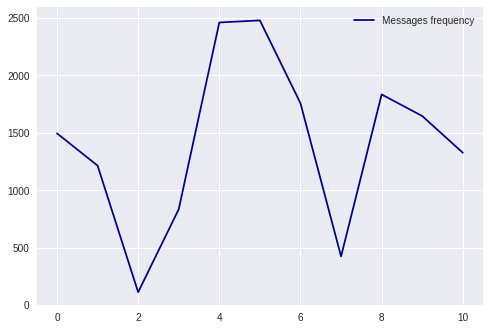

In [43]:
hour_twits.reset_index().plot(y='count', color='DarkBlue', label='Messages frequency')

### Draw a diagram of distribution of word “iot” with normalization

In [44]:
hour_twits['iot_normal'] = hour_twits['sum'] / hour_twits['count'] 
hour_twits

,sum,count,iot_normal
created_at,,,
2018-10-23 23:00:00,83,1495,0.055518
2018-10-24 00:00:00,78,1214,0.064250
2018-10-24 01:00:00,7,111,0.063063
2018-10-24 10:00:00,49,834,0.058753
2018-10-24 11:00:00,153,2461,0.062170
2018-10-24 12:00:00,165,2479,0.066559
2018-10-24 13:00:00,211,1757,0.120091
2018-10-24 20:00:00,17,423,0.040189
2018-10-24 21:00:00,121,1834,0.065976


In [45]:
from sklearn import preprocessing
hour_twits['iot_normal'] = preprocessing.scale(hour_twits['iot_normal'].astype('float64'))
hour_twits

,sum,count,iot_normal
created_at,,,
2018-10-23 23:00:00,83,1495,-0.651732
2018-10-24 00:00:00,78,1214,-0.196860
2018-10-24 01:00:00,7,111,-0.258712
2018-10-24 10:00:00,49,834,-0.483234
2018-10-24 11:00:00,153,2461,-0.305242
2018-10-24 12:00:00,165,2479,-0.076595
2018-10-24 13:00:00,211,1757,2.712014
2018-10-24 20:00:00,17,423,-1.450271
2018-10-24 21:00:00,121,1834,-0.106970


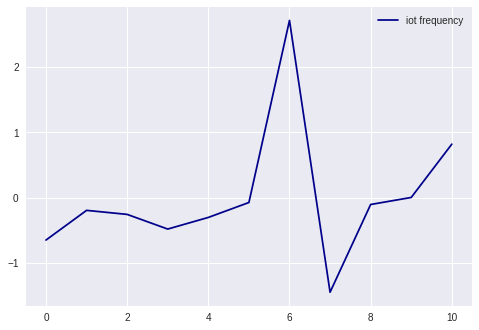

In [46]:
hour_twits.reset_index().plot(y='iot_normal', color='DarkBlue', label='iot frequency')

## Using word2vec to analyze word relationships

In [47]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stops = set(stopwords.words("english")) 
stops = stops.union(['1', '2', '3', '4', '5', '6', '7', '8', '9', '0'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
df['text_stripped'] = df['text_stripped'].apply(lambda x: x.split()).apply(lambda words: [w for w in words if not w in stops]).apply(lambda x: " ".join(x))

words_list = [twit for twit in df['text_stripped']]

In [49]:
words_list[20:30]

['tech improve make faster pilot dataanalytics vr smartinfrastructure ai solu',
 'cloudy perspective financecloud api device crypto altcoins bitcoin bittrex erc btc blockchain altcoin cryp',
 'effective content marketing tip startup socialmedia socialmediamarketing digi',
 'artificial intelligence enterprise business waking ai',
 'oh dear ai art wtaf',
 'latest artificialintelligence today thanks',
 'another nice post director product marketing matt bushell trend machine learning affectin',
 'scripps tackle artificialintelligence ai tool best practice genomics health sensor http',
 'robot spoke parliament robotics technology ai artificialintelligence via cc',
 'transforming financial sector customer experience ai ai machinelearning deeplearning bigdata fintech']

In [0]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in data:
        word_list = sentence.split(" ")
        corpus.append(word_list)    
           
    return corpus

corpus = build_corpus(words_list)

In [51]:
corpus[42]

['great',
 'speaking',
 'ceo',
 'linda',
 'hasenfratz',
 'today',
 'stay',
 'tuned',
 'spotlight',
 'future',
 'manufact']

In [0]:
!pip install gensim
!pip install adjustText

In [0]:
from gensim.models import word2vec
# run the model
model = word2vec.Word2Vec(corpus, size=100, window=5, min_count=150, workers=4)

In [54]:
len(model.wv.vocab)

139

In [56]:
[x for x in model.wv.vocab][0:5]

['crypto', 'bitcoin', 'blockchain', '5g', 'data']

In [57]:
[(item[0],round(item[1],2)) for item in model.most_similar('work')]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('could', 0.99),
 ('10', 0.97),
 ('futureofwork', 0.97),
 ('top', 0.96),
 ('china', 0.96),
 ('via', 0.96),
 ('innovation', 0.96),
 ('human', 0.95),
 ('next', 0.95),
 ('say', 0.95)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


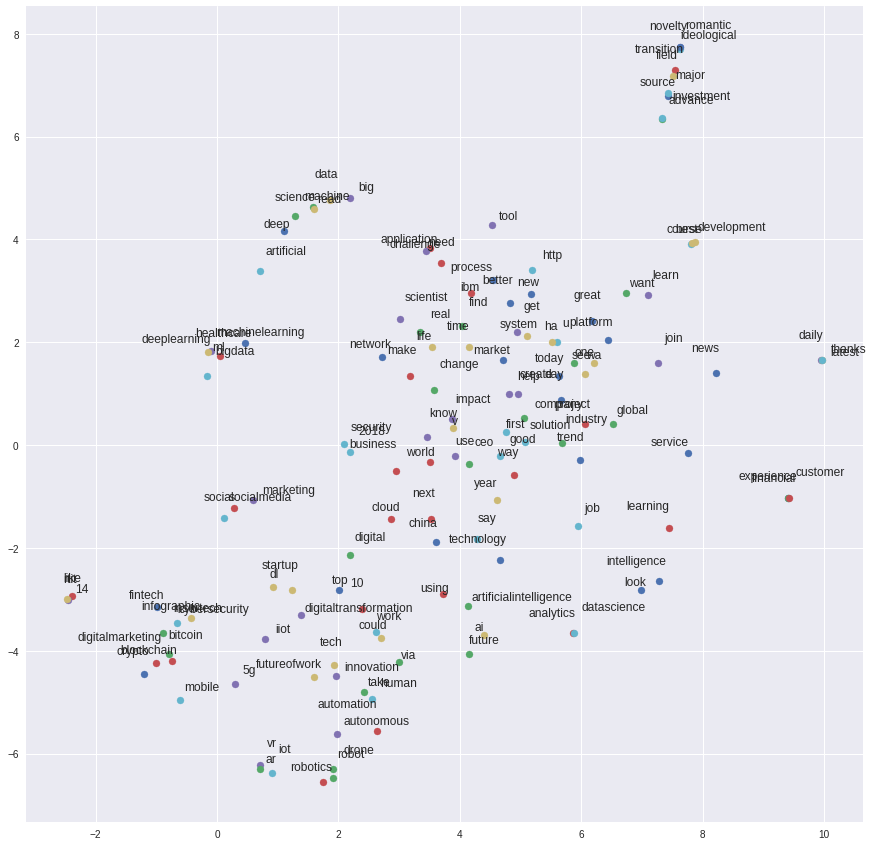

In [59]:
# import the t-SNE library and matplotlib for plotting
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random


# define the function to compute the dimensionality reduction
# and then produce the biplot
def tsne_plot(model):
    "Creates a TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15, 15)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        if i % 2 == 0: 
          plt.annotate(labels[i],
                       xy=(x[i], y[i]),
                       xytext=(random.randint(0,10), random.randint(0,20)),
                       textcoords='offset points',
                       ha='right',
                       va='bottom')       
        else:
          plt.annotate(labels[i],
                       xy=(x[i], y[i]),
                       xytext=(random.randint(0,10), random.randint(0,20)),
                       textcoords='offset points',
                       ha='left',
                       va='bottom')     
    plt.show()
    
# call the function on our dataset
tsne_plot(model)


### Finding best correlation among all popular words

In [86]:
text_chuncks = df[['text_stripped']].groupby(lambda x: x//1000).sum()
text_chuncks.iloc[0]

text_stripped    cloudy perspective financecloud api device cry...
Name: 0, dtype: object

In [0]:
import itertools

correlations = {}

for pair in list(itertools.combinations(model.wv.vocab, 2)):
  correlations[pair] = text_chuncks['text_stripped'].apply(lambda x: word_count(x, word=pair[0])).corr(text_chuncks['text_stripped'].apply(lambda x: word_count(x, word=pair[1])))
  

In [0]:
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

In [90]:
sorted_correlations[0:50]

[(('romantic', 'novelty'), 1.0),
 (('ideological', 'romantic'), 0.9998730602362624),
 (('ideological', 'novelty'), 0.9998730602362624),
 (('transition', 'romantic'), 0.9997727943829751),
 (('transition', 'novelty'), 0.9997727943829751),
 (('ideological', 'transition'), 0.9996273532635618),
 (('14', 'rtit'), 0.9959493198507854),
 (('field', 'romantic'), 0.9926306707799928),
 (('field', 'novelty'), 0.9926306707799928),
 (('field', 'ideological'), 0.9922001940263625),
 (('field', 'transition'), 0.9911690363877701),
 (('major', 'romantic'), 0.9889495669397359),
 (('major', 'novelty'), 0.9889495669397359),
 (('major', 'ideological'), 0.9889422731672469),
 (('major', 'transition'), 0.9881225970024621),
 (('source', 'romantic'), 0.9871267806546083),
 (('source', 'novelty'), 0.9871267806546083),
 (('source', 'ideological'), 0.9864077291965336),
 (('source', 'transition'), 0.985859060369485),
 (('major', 'investment'), 0.9843968606011557),
 (('source', 'field'), 0.982802595519815),
 (('major', 

In [93]:
sorted_correlations[:-50:-1]

[(('great', 'ceo'), -0.7807473587990399),
 (('iiot', 'find'), -0.7514662524891124),
 (('drone', 'need'), -0.7356631056178027),
 (('using', 'datascience'), -0.7186922985542051),
 (('job', 'iiot'), -0.7150300703646066),
 (('new', 'iiot'), -0.712372706315109),
 (('look', 'one'), -0.711182462824297),
 (('data', 'using'), -0.7058917035105765),
 (('drone', 'better'), -0.6976788732262265),
 (('news', 'iiot'), -0.6947231328715862),
 (('ha', 'network'), -0.6871763958004549),
 (('source', 'make'), -0.6802699487162069),
 (('customer', 'field'), -0.6789753556673291),
 (('customer', 'ideological'), -0.6688651627984757),
 (('source', 'startup'), -0.6657934200559932),
 (('customer', 'novelty'), -0.6655333265757579),
 (('customer', 'romantic'), -0.6655333265757579),
 (('healthcare', 'one'), -0.6653564326209424),
 (('customer', 'transition'), -0.6651106542896346),
 (('china', 'ceo'), -0.662043761115957),
 (('digitaltransformation', 'major'), -0.6539479070746079),
 (('way', 'mobile'), -0.652501326615440

**Interesting conclusion**: CEO cannot be great, customer cannot be ideological, digitaltransformation cannot be romantic